In this notebook we will explore the statistical properties of the "N+1 fish, N+2 fish" training dataset

In [64]:
import sys
import os
pjoin = os.path.join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# we will assume that the training data, namely training videos and ground truth csv file are under ./data directory
data_root = './data'
video_dir = pjoin(data_root, 'train_videos')
gt_csv = pjoin(data_root, 'training.csv')
assert os.path.exists(video_dir), '{} does not exists'.format(video_dir)
assert os.path.exists(gt_csv), '{} does not exists'.format(gt_csv)

In [24]:
import pandas as pd

anno = pd.read_csv(gt_csv)

anno.head(10)

,row_id,video_id,frame,fish_number,length,x1,y1,x2,y2,species_fourspot,species_grey sole,species_other,species_plaice,species_summer,species_windowpane,species_winter
0,0,00WK7DR6FyPZ5u3A,0,1.0,165.3028,766.0,531.0,659.0,405.0,0,1,0,0,0,0,0
1,1,00WK7DR6FyPZ5u3A,18,2.0,176.5814,776.0,540.0,661.0,406.0,0,1,0,0,0,0,0
2,2,00WK7DR6FyPZ5u3A,41,3.0,172.4297,772.0,538.0,666.0,402.0,0,1,0,0,0,0,0
3,3,00WK7DR6FyPZ5u3A,63,4.0,166.6433,770.0,531.0,667.0,400.0,0,1,0,0,0,0,0
4,4,00WK7DR6FyPZ5u3A,82,5.0,177.8820,777.0,544.0,666.0,405.0,0,1,0,0,0,0,0
5,5,00WK7DR6FyPZ5u3A,100,6.0,161.4435,763.0,527.0,655.0,407.0,0,1,0,0,0,0,0
6,6,00WK7DR6FyPZ5u3A,115,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
7,7,00WK7DR6FyPZ5u3A,123,7.0,181.6865,777.0,543.0,660.0,404.0,0,1,0,0,0,0,0
8,8,00WK7DR6FyPZ5u3A,142,8.0,206.4655,789.0,563.0,661.0,401.0,0,1,0,0,0,0,0
9,9,00WK7DR6FyPZ5u3A,160,9.0,197.0913,783.0,556.0,660.0,402.0,0,1,0,0,0,0,0


In [4]:
# check whether all the videos are annotated
video_fnames_anno = set(anno.video_id)
video_fnames_mp4 = set([fname.split('.')[0] for fname in os.listdir(video_dir) if fname.endswith('.mp4')])
assert video_fnames_anno == video_fnames_mp4, 'Annotated videos and mp4 files differ'
video_fnames = list(video_fnames_anno)

In [55]:
ann_idx = anno.fish_number.notnull() # frames with annotated fish
ann_species = anno.loc[ann_idx].iloc[:,-7:]
# we want to make sure each fish has a unique species
assert (ann_species.sum(axis=1) == 1).sum() == ann_species.shape[0]

species_fourspot       4214
species_grey sole      5931
species_other          1840
species_plaice         5288
species_summer         1808
species_windowpane    32194
species_winter         4857
dtype: int64


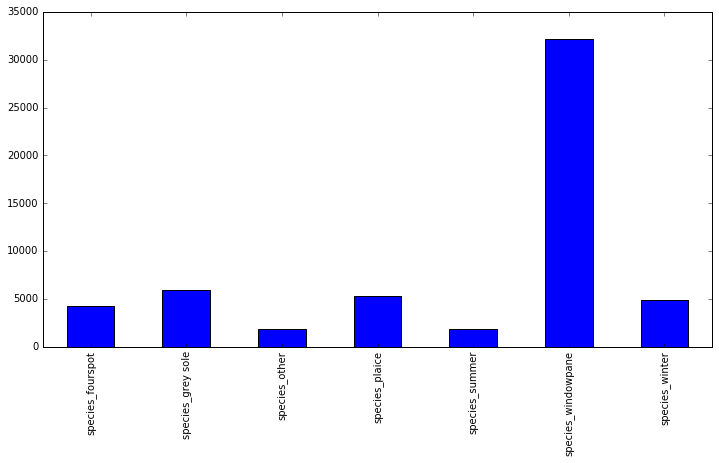

In [79]:
plt.figure(figsize=(12,6))
species_num = ann_species.sum(axis=0)
species_num.plot(kind='bar')
print species_num

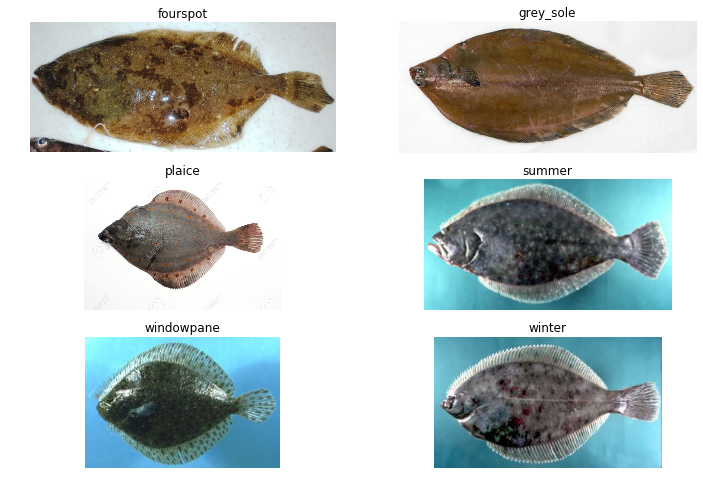

In [77]:
plt.figure(figsize=(12, 8))
for i, fish in enumerate(['fourspot', 'grey_sole', 'plaice', 'summer', 'windowpane', 'winter']):
    plt.subplot(3,2,i+1)
    img = plt.imread(pjoin(data_root, 'fish_image', fish + '.jpg'))
    plt.imshow(img)
    plt.title(fish)
    plt.axis('off')